In [8]:
# !pip install matplotlib

In [1]:
!python --version

Python 3.10.14


In [2]:
import pandas as pd

data = pd.read_csv("./tes.csv")

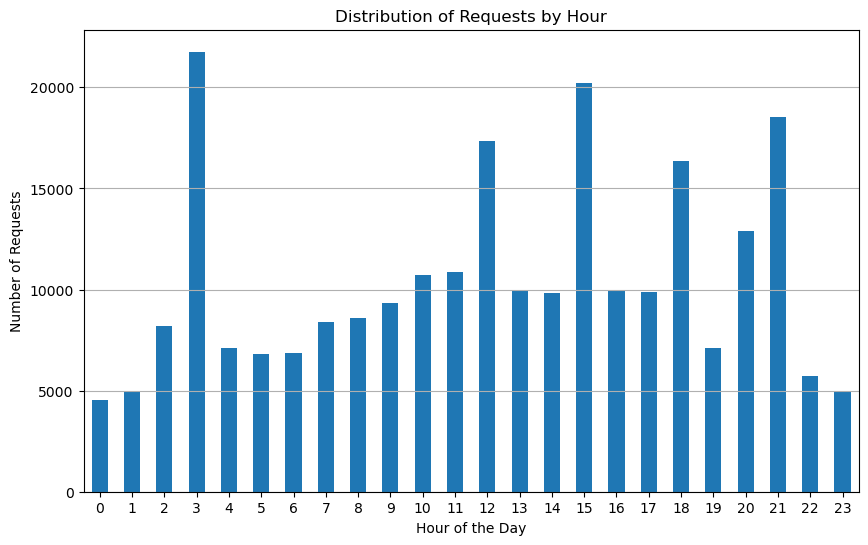

In [3]:
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Extract hour from the 'time' column
data['hour'] = data['time'].dt.hour

# Plot the distribution of requests by hour
plt.figure(figsize=(10, 6))
data['hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.title('Distribution of Requests by Hour')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [4]:
# Count the number of requests per IP address
ip_counts = data['ip'].value_counts().reset_index()
ip_counts.columns = ['ip', 'request_count']

# Get the top 10 IP addresses with the highest number of requests
top_ips = ip_counts.head(10)

print("Top 10 IP Addresses with the Most Requests")
top_ips

Top 10 IP Addresses with the Most Requests


,ip,request_count
0,4803b0aa806a74cf90d4a7a1cebf495aba0aa35e5f082c...,70877
1,4926006490fee3f0625569f873cf10b3a736fd0d13f939...,23916
2,5c289a3271daca4f51220cc0515e8c355fb90a89544a74...,18824
3,b9de71885a32bd76cf8794337f85b24b31d92d1e6d0229...,14444
4,93b82bff2231407dcdfe9cb525498ba61836709df0f975...,12576
5,8fc91a581747f99b7253145ec1247bc4373fbe94056e80...,10884
6,4a55972ea68fd333dae45490a1e6240bf4c32120a24080...,6067
7,2fc7d7a5e6f4d1660829de698f7c2e1b9db4939aa12953...,5232
8,90f9aff1dd2d315b387f7c5d36f4c610a927e8a78f9640...,4516
9,16e34094840d31de3bf000ed430ac64fda372dbcb5978b...,4332


C:\Users\apria.PLAINWHITE\AppData\Local\Temp\ipykernel_19236\729364617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ip_data['date'] = top_ip_data['time'].dt.date
C:\Users\apria.PLAINWHITE\AppData\Local\Temp\ipykernel_19236\729364617.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ip_data['hour'] = top_ip_data['time'].dt.hour


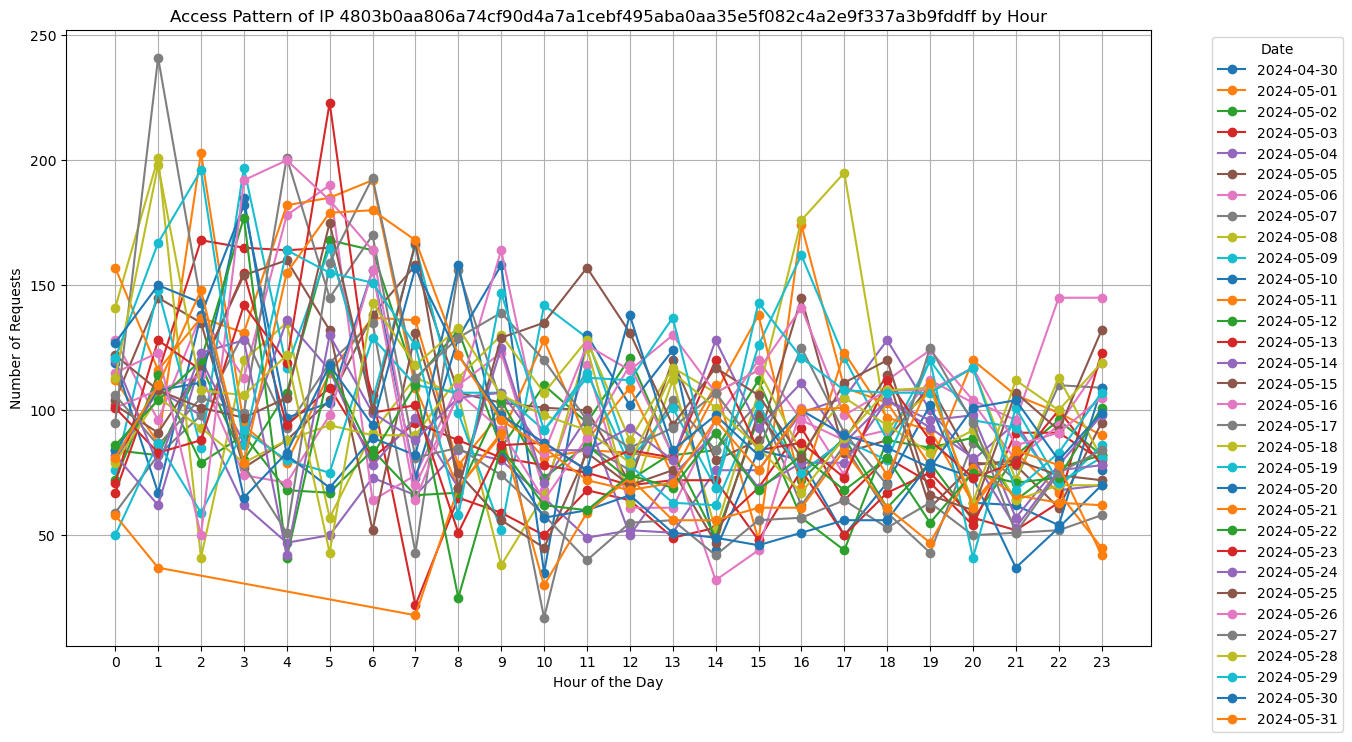

In [5]:
# Filter data for the IP address with the highest number of requests
top_ip = top_ips.iloc[0]['ip']
top_ip_data = data[data['ip'] == top_ip]

# Extract date and hour for the top IP address
top_ip_data['date'] = top_ip_data['time'].dt.date
top_ip_data['hour'] = top_ip_data['time'].dt.hour

# Aggregate the data by date and hour
top_ip_hourly = top_ip_data.groupby(['date', 'hour']).size().reset_index(name='request_count')

# Plot the access pattern of the top IP address
plt.figure(figsize=(14, 8))
for date in top_ip_hourly['date'].unique():
    daily_data = top_ip_hourly[top_ip_hourly['date'] == date]
    plt.plot(daily_data['hour'], daily_data['request_count'], marker='o', label=str(date))

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.title(f'Access Pattern of IP {top_ip} by Hour')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(range(24))

plt.show()

In [6]:
# Identifikasi sesi pengguna berdasarkan IP dan waktu aktivitas.

import pandas as pd

# Read the data
file_path = './tes.csv'
data = pd.read_csv(file_path)

# Convert the 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Sort data by IP and time
data = data.sort_values(by=['ip', 'time'])

# Set a time threshold for session (e.g., 30 minutes)
session_threshold = pd.Timedelta(minutes=30)

# Initialize a session_id column
data['session_id'] = (data.groupby('ip')['time']
                      .diff().gt(session_threshold).cumsum())

# Combine IP and session_id to get unique session identifier
data['session'] = data['ip'].astype(str) + '-' + data['session_id'].astype(str)

# Display the first few rows to see the session identification
data.head()

,ip,time,request,session_id,session
109951,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...,2024-05-13 22:36:53+07:00,/model/data/domain/0000/var/1470/th/122/vervar...,0,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...
110091,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...,2024-05-13 22:39:00+07:00,/model/data/domain/0000/var/1470/th/123/vervar...,0,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...
110770,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...,2024-05-14 01:32:21+07:00,/model/data/domain/0000/var/1470/th/123/vervar...,1,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...
110768,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...,2024-05-14 01:34:56+07:00,/model/data/domain/0000/var/1470/th/122/vervar...,1,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...
110769,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...,2024-05-14 01:34:56+07:00,/model/data/domain/0000/var/1189/vervar/9999/,1,0009cdf5bb72d7a45108f9b43f7ba4f4179d82f80cf6c2...


In [ ]:
# Menghitung frekuensi permintaan untuk setiap halaman.